## Financial Planning

In [20]:
# Initial Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

In [21]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Part 1 - Personal Finance Planner

**Collect crypto prices using the `requests` library**

In [22]:
# Set current amount of crypto assets
BTC_assets = 1.2
ETH_assets = 5.3

In [23]:
#Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [41]:
# Fetch current BTC price
current_btc_price_req = requests.get(btc_url).json()
#print(json.dumps(current_btc_price_req, indent = 4)) 
current_btc_price = current_btc_price_req["data"]["1"]["quotes"]["USD"]["price"]
#print(current_btc_price)  

# Fetch current ETH price
current_eth_price_req = requests.get(eth_url).json()
#print(json.dumps(current_eth_price_req, indent = 4)). 
current_eth_price = current_eth_price_req["data"]["1027"]["quotes"]["USD"]["price"]
#print(current_eth_price).

# Compute current value of crypto assets
current_btc_value = BTC_assets * current_btc_price
current_eth_value = ETH_assets * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {BTC_assets} BTH is ${current_btc_value:0.2f}")
print(f"The current value of your {ETH_assets} ETH is ${current_eth_value:0.2f}")

The current value of your 1.2 BTH is $13685.38
The current value of your 5.3 ETH is $2001.76


** Collect Investments data using Alpaca: `SPY` (stocks) and `AGG` (bonds)**

In [42]:
# Current amount of shares
spy_shares = 50
agg_shares = 200

In [69]:
# Format current date as ISO format
current_date = pd.Timestamp("now", tz = "America/New_York").isoformat()

# Set tickers
tickers = ["AGG", "SPY"]

# Set timeframe to 1 day for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

agg_close = ticker_data["AGG"]["close"]["2020-10-14"]
spy_close = ticker_data["SPY"]["close"]["2020-10-14"]

# Print AGG and SPY close price
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $118.04
Current SPY closing price: $347.97


In [71]:
# Compute the current value of shares
current_spy_value = spy_shares * spy_close
current_agg_value = agg_shares * agg_close

# Print current value of shares
print(f"The current value of your {spy_shares} SPY shares is ${current_spy_value:0.2f}")
print(f"The current value of your {agg_shares} AGG shares is ${current_agg_value:0.2f}")

The current value of your 50 SPY shares is $17398.50
The current value of your 200 AGG shares is $23608.00


** Savings Health Analysis **

In [97]:
# Set monthly household income
monthly_house_income = 12000

# Create savings dataframe
crypto_savings = current_btc_value + current_eth_value
shares_savings = current_agg_value + current_spy_value

savings_df = {
    "Amount":{
        "crypto": crypto_savings,
        "shares": shares_savings
    }
}

savings_df = pd.DataFrame(savings_df)
savings_df

,Amount
crypto,15687.133
shares,41006.500


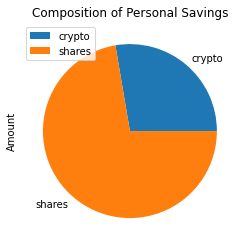

In [98]:
# Plot savings pie chart
savings_df.plot(kind = "pie", y = "Amount", title = "Composition of Personal Savings")

In [99]:
# Set ideal emrgency fund
emergency_fund = monthly_house_income * 3

# Calculate total amount of savings
total_savings = crypto_savings + shares_savings

# Validate saving health
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
else:
    print("You need to save $" + str(emergency_fund - total_savings) + " more")

Congratulations! You have enough money in your emergency fund
